### EDA CSV InvoicePurchases12312016

In [1]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Cargar el dataset
df_InvoicePurchase = pd.read_csv("Dataset/InvoicePurchases12312016.csv")
df_InvoicePurchase.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [3]:
# Obtener información general del dataset
df_InvoicePurchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [4]:
# Descripción estadística básica
df_InvoicePurchase.describe()

,VendorNumber,PONumber,Quantity,Dollars,Freight
count,5543.00000,5543.000000,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,10889.419087,6058.880931,5.807338e+04,295.954301
std,34582.15841,1600.859969,14453.338164,1.402340e+05,713.585093
min,2.00000,8106.000000,1.000000,4.140000e+00,0.020000
25%,3089.00000,9503.500000,83.000000,9.678100e+02,5.020000
50%,7240.00000,10890.000000,423.000000,4.765450e+03,24.730000
75%,10754.00000,12275.500000,5100.500000,4.458718e+04,229.660000
max,201359.00000,13661.000000,141660.000000,1.660436e+06,8468.220000


In [5]:
# Verificación de valores nulos
df_InvoicePurchase.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [6]:
# Reemplazar los valores NaN en la columna 'Approval' con 'No Aplica'
df_InvoicePurchase['Approval'] = df_InvoicePurchase['Approval'].fillna('No Aplica')

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(df_InvoicePurchase.head())

   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight   Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47  No Aplica  
1  2015-12-22  2016-02-21        15     140.55     8.57  No Aplica  
2  2015-12-24  2016-02-16         5     106.60     4.61  No Aplica  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20  No Aplica  
4  2015-12-24  2016-02-12      1935   15527.25   429.20  No Aplica  


In [7]:
#Verificación de la cantidad de filas y columnas
np.shape(df_InvoicePurchase)

(5543, 10)

In [8]:
# Verificar si hay filas duplicadas
duplicated_rows = df_InvoicePurchase.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas en df_invoicepurchase: {num_duplicated_rows}')

Número de filas duplicadas en df_invoicepurchase: 0


In [9]:
# se verifica el tipo de dato de cada columna
print(df_InvoicePurchase.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [10]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_InvoicePurchase.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_InvoicePurchase[df_InvoicePurchase[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [11]:
#Analisis de las columnas
for i in df_InvoicePurchase.columns:
    print(i)
    print(df_InvoicePurchase[i].describe()) #descripcion basica 
    print('--------------------------------------')

VendorNumber
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: VendorNumber, dtype: float64
--------------------------------------
VendorName
count                            5543
unique                            129
top       AMERICAN VINTAGE BEVERAGE  
freq                               55
Name: VendorName, dtype: object
--------------------------------------
InvoiceDate
count           5543
unique           373
top       2016-07-04
freq              43
Name: InvoiceDate, dtype: object
--------------------------------------
PONumber
count     5543.000000
mean     10889.419087
std       1600.859969
min       8106.000000
25%       9503.500000
50%      10890.000000
75%      12275.500000
max      13661.000000
Name: PONumber, dtype: float64
--------------------------------------
PODate
count           5543
unique           319
top       2016-06-25
freq      

##### Presencia de Outliers: Las grandes diferencias entre la media y la mediana en las columnas Quantity, Dollars, y Freight indican que hay varias transacciones de gran magnitud que podrían distorsionar los análisis.

##### Distribución de Fechas: Tanto las fechas de las facturas como las órdenes de compra y pagos están distribuidas en varios días, pero ciertos días destacan por una mayor actividad. hubo un pico significativo el 4 de julio de 2016.

##### Dominancia de Proveedores: Aunque hay 129 proveedores únicos, algunos proveedores, como AMERICAN VINTAGE BEVERAGE, son responsables de una cantidad desproporcionada de transacciones.

##### 1. VendorNumber:  Cantidad de datos: 5543 valores. Promedio: El número promedio de proveedor es 20,662, lo que indica que los identificadores de proveedores están distribuidos a lo largo de un rango amplio.  Mínimo y máximo: El número más bajo de proveedor es 2 y el más alto es 201,359, lo que sugiere una amplia variedad de proveedores en el sistema.  Mediana (50%): El valor en el punto medio es 7,240, lo que indica que la mayoría de los proveedores tienen números relativamente bajos en comparación con el máximo.  Conclusión: Hay una gran variabilidad en los identificadores de los proveedores, pero la mayoría parecen estar agrupados en un rango menor que el valor máximo, lo que podría sugerir que los proveedores más recientes (con números altos) son menos frecuentes.

##### 2. VendorName:  Cantidad de datos: 5543 valores.  Proveedores únicos: 129 proveedores únicos, lo que sugiere que algunos proveedores realizan múltiples transacciones.  Proveedor más frecuente: AMERICAN VINTAGE BEVERAGE es el proveedor con más transacciones, representando 55 entradas en el dataset.  Conclusión: A pesar de que hay 129 proveedores únicos, algunos, como AMERICAN VINTAGE BEVERAGE, dominan en términos de volumen de transacciones.

##### 3. InvoiceDate:  Cantidad de datos: 5543 facturas. Fechas únicas: 373 fechas únicas, lo que indica que se emitieron facturas en múltiples días.  Fecha más frecuente: 4 de julio de 2016 es la fecha más común con 43 facturas emitidas en ese día.  Conclusión: La actividad de emisión de facturas parece estar bastante distribuida a lo largo de diferentes días, pero hubo un pico significativo el 4 de julio de 2016.

##### 4. PONumber:  Cantidad de datos: 5543 órdenes de compra (PO).  Promedio y mediana: El número promedio de órdenes de compra es 10,889 y la mediana es 10,890, lo que sugiere que los números de órdenes están bastante equilibrados. Rango: El número más bajo es 8,106 y el más alto es 13,661.  Conclusión: Los números de órdenes de compra están bastante distribuidos y centrados alrededor de la mediana, sin variaciones significativas fuera del rango normal.

##### 5. PODate:  Cantidad de datos: 5543 órdenes de compra con fechas.  Fechas únicas: 319 fechas únicas para las órdenes de compra. Fecha más frecuente: 25 de junio de 2016 es la fecha más común con 86 órdenes emitidas ese día. Conclusión: Las órdenes de compra se realizaron en varias fechas a lo largo del tiempo, pero el 25 de junio de 2016 destaca como un día de alta actividad.

##### 6. PayDate:  Cantidad de datos: 5543 fechas de pago. Fechas únicas: 382 fechas únicas para los pagos. Fecha más frecuente: 14 de agosto de 2016 es la fecha más común con 31 pagos procesados. Conclusión: Aunque los pagos están distribuidos en 382 fechas, hubo una mayor concentración de pagos realizados el 14 de agosto de 2016.

##### 7. Quantity:  Cantidad de datos: 5543 entradas con cantidad de productos comprados.  Promedio y mediana: La cantidad promedio comprada es de 6,059 unidades, mientras que la mediana es mucho menor, con 423 unidades. Rango: La cantidad mínima comprada es 1 y la máxima es 141,660. Conclusión: La diferencia significativa entre la media y la mediana, junto con el alto valor máximo, sugiere que existen varias compras de cantidades extremadamente grandes, lo que distorsiona la media y podría indicar la presencia de outliers.

##### 8. Dollars:  Cantidad de datos: 5543 entradas de transacciones monetarias. Promedio y mediana: El monto promedio es de $58,073.38, pero la mediana es significativamente más baja con $4,765.45. Rango: El valor mínimo es $4.14 y el máximo es $1,660,436.00. Conclusión: Al igual que la cantidad de productos, el alto valor de la media en comparación con la mediana indica que existen algunas transacciones monetarias extremadamente grandes, lo que también sugiere la presencia de outliers en los datos financieros.

##### 9. Freight:  Cantidad de datos: 5543 entradas sobre los costos de envío.  Promedio y mediana: El costo promedio de flete es de $295.95, mientras que la mediana es mucho más baja, de $24.73. Rango: El costo de flete más bajo es de $0.02 y el más alto es $8,468.22. Conclusión: Hay una amplia variabilidad en los costos de envío, y los valores más altos (outliers) inflan el promedio, lo que hace que la mediana sea una mejor medida central en este caso.

##### 10. Approval:  Cantidad de datos: 5543 entradas con estado de aprobación. Valores únicos: Solo hay dos valores posibles.  Valor más frecuente: "No Aplica" aparece 5169 veces, lo que sugiere que la mayoría de las transacciones no requieren aprobación o no tienen un estado de aprobación asignado. Conclusión: La mayoría de las transacciones parecen no tener un estado de aprobación o no es relevante para el análisis.

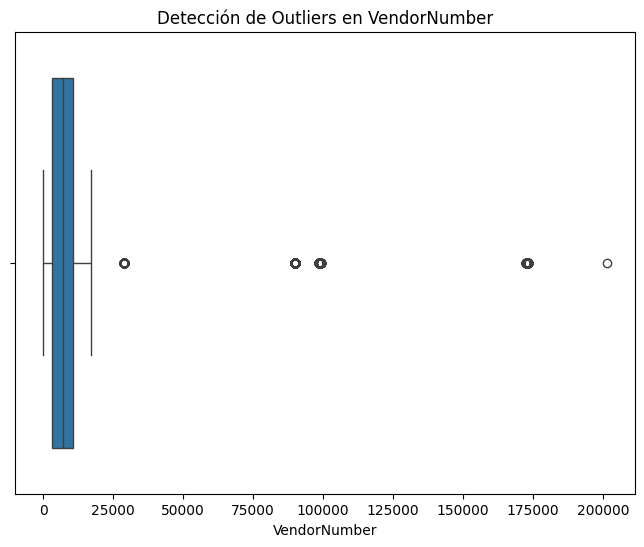

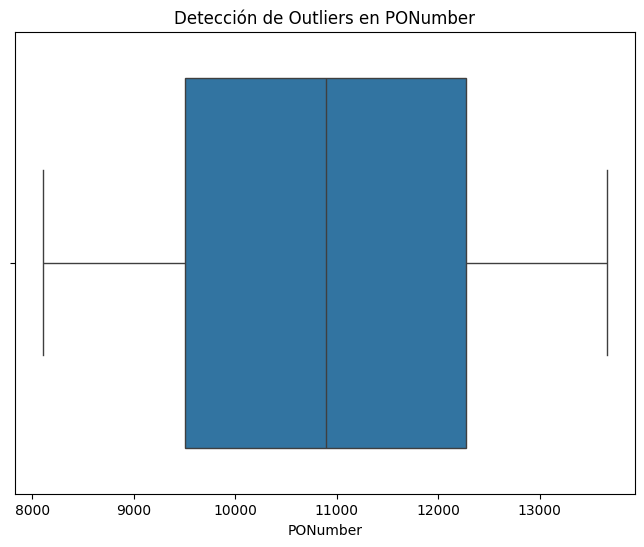

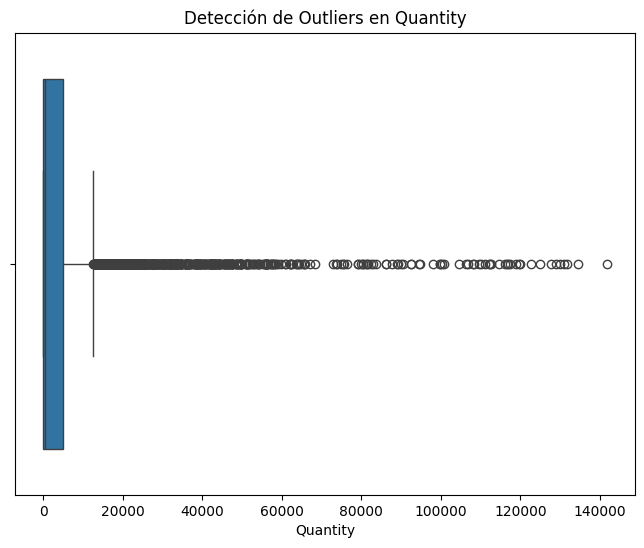

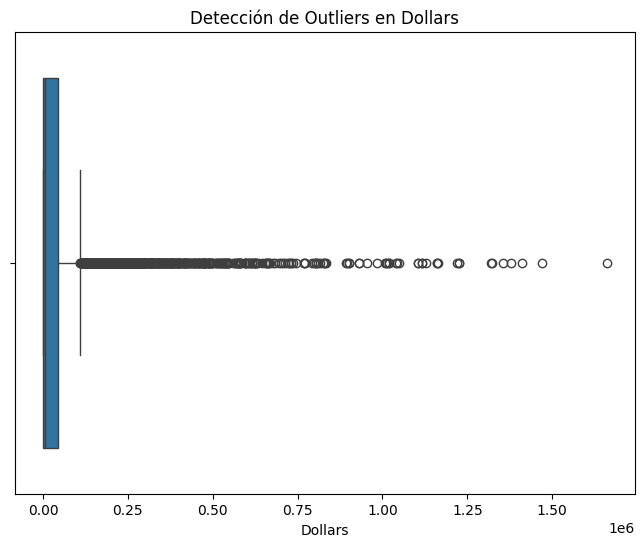

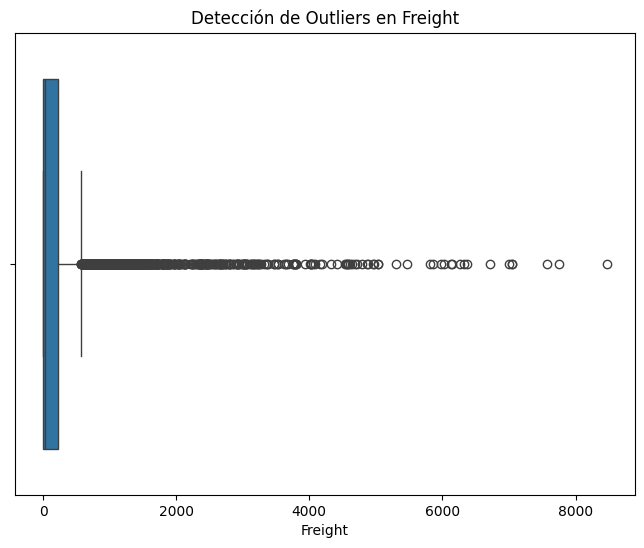

In [12]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_InvoicePurchase.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_InvoicePurchase[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [13]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

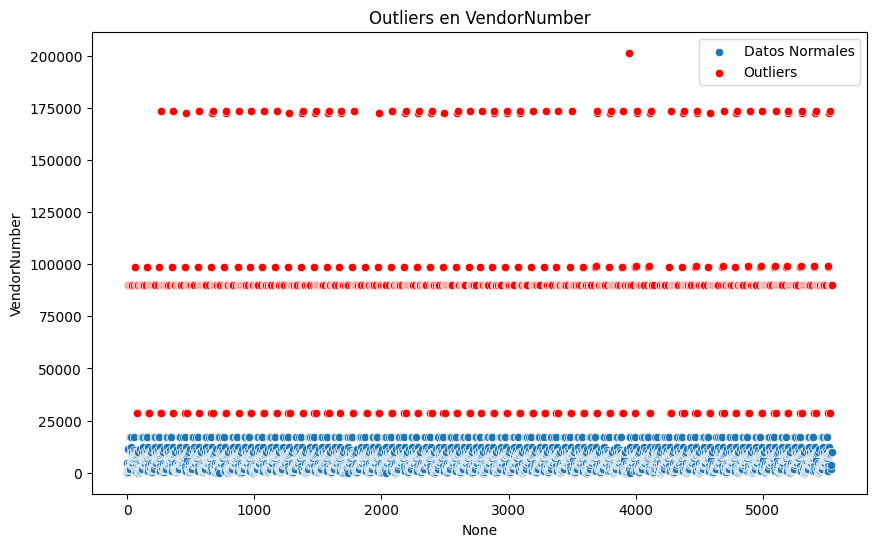

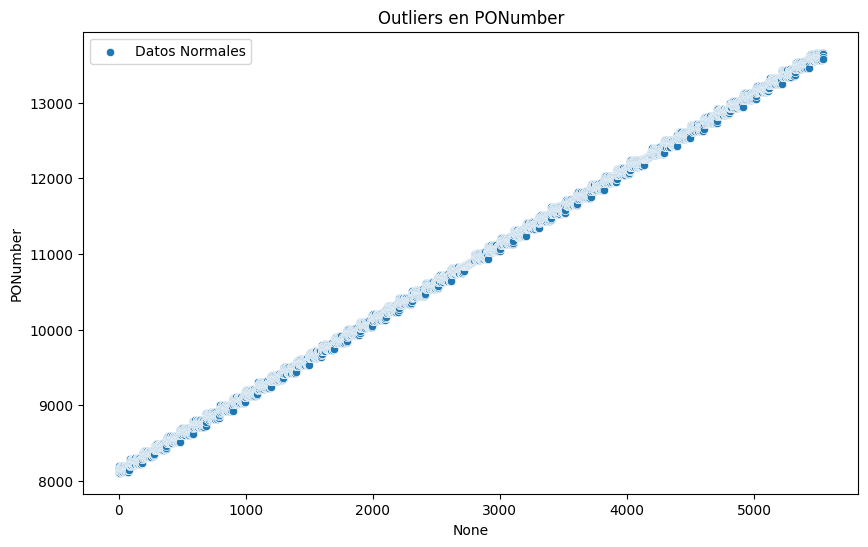

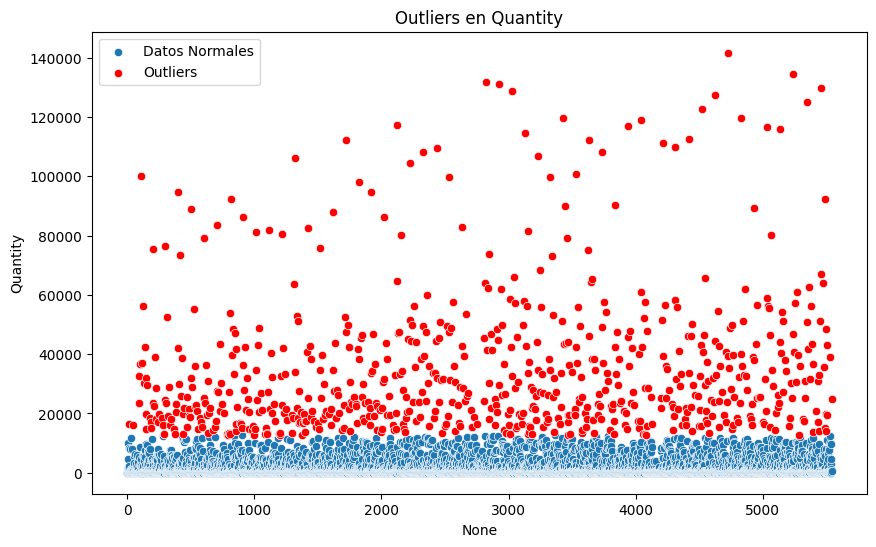

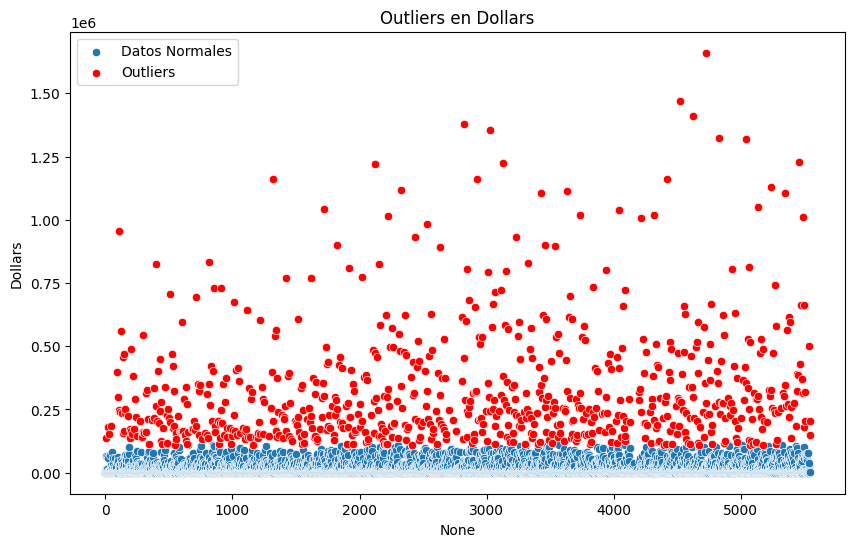

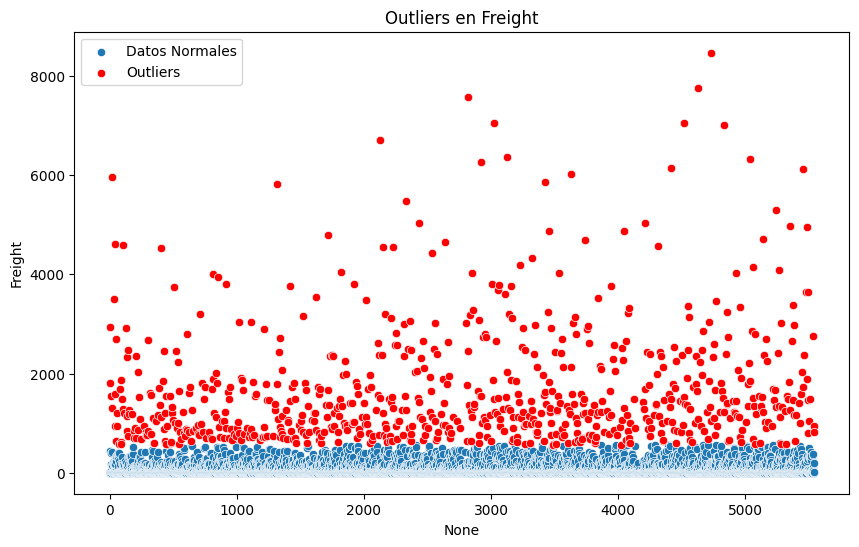

In [14]:
# Gráfico para mostrar outliers junto con datos normales
columnas_a_verificar = df_InvoicePurchase.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_InvoicePurchase.index, y=df_InvoicePurchase[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_InvoicePurchase, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()

In [15]:
# Ver las filas con outliers para una columna específica ('Freight')
outliers_Freight = detectar_outliers(df_InvoicePurchase, 'Freight')
print(outliers_Freight)

      VendorNumber                   VendorName InvoiceDate  PONumber  \
3              480  BACARDI USA INC              2016-01-12      8106   
6             1128  BROWN-FORMAN CORP            2016-01-09      8150   
14            1392  CONSTELLATION BRANDS INC     2016-01-11      8108   
18            3960  DIAGEO NORTH AMERICA INC     2016-01-10      8173   
22            3252  E & J GALLO WINERY           2016-01-09      8110   
...            ...                          ...         ...       ...   
5503          7245  PROXIMO SPIRITS INC.         2017-01-07     13653   
5507          8004  SAZERAC CO INC               2017-01-10     13567   
5532          9165  ULTRA BEVERAGE COMPANY LLP   2017-01-10     13658   
5540          3664  WILLIAM GRANT & SONS INC     2017-01-02     13643   
5541          9815  WINE GROUP INC               2017-01-03     13602   

          PODate     PayDate  Quantity    Dollars  Freight        Approval  
3     2015-12-20  2016-02-05     10100  137483

In [16]:
# Se analiza a que se deben los altos costos de envios
# Ordenar el DataFrame por la columna 'Freight' en orden descendente y seleccionar las primeras 20 filas
top_50_freight_rows = df_InvoicePurchase.nlargest(50, 'Freight')

# Mostrar las 50 filas con mayor valor en 'Freight' en todas las columnas
print(top_50_freight_rows)

      VendorNumber                   VendorName InvoiceDate  PONumber  \
4728          3960  DIAGEO NORTH AMERICA INC     2016-11-15     12833   
4627          3960  DIAGEO NORTH AMERICA INC     2016-11-12     12771   
2822          3960  DIAGEO NORTH AMERICA INC     2016-07-16     10936   
4521          3960  DIAGEO NORTH AMERICA INC     2016-11-03     12618   
3025          3960  DIAGEO NORTH AMERICA INC     2016-08-01     11191   
4829          3960  DIAGEO NORTH AMERICA INC     2016-11-29     12981   
2125          3960  DIAGEO NORTH AMERICA INC     2016-06-06     10260   
3129          3960  DIAGEO NORTH AMERICA INC     2016-08-03     11300   
5037          3960  DIAGEO NORTH AMERICA INC     2016-12-07     13190   
2924          3960  DIAGEO NORTH AMERICA INC     2016-07-26     11028   
4416          3960  DIAGEO NORTH AMERICA INC     2016-10-25     12579   
5456          3960  DIAGEO NORTH AMERICA INC     2017-01-10     13594   
3631          3960  DIAGEO NORTH AMERICA INC     20

##### 48 ordenes del top 50 corresponden al unico proveedor con un estado de aprovador que aparece con nombre que es Frank Delahunt

In [17]:
# Filtrar las filas donde 'Approval' es 'Frank Delahunt' y obtener el valor menor de 'Dollars'
min_dollars_frank_delahunt = df_InvoicePurchase[df_InvoicePurchase['Approval'] == 'Frank Delahunt']['Dollars'].min()

# Filtrar las filas donde 'Approval' es 'No Aplica' y obtener el valor mayor de 'Dollars'
max_dollars_no_aplica = df_InvoicePurchase[df_InvoicePurchase['Approval'] == 'No Aplica']['Dollars'].max()

# Mostrar los resultados
print(f"El valor menor de 'Dollars' donde 'Approval' es 'Frank Delahunt': {min_dollars_frank_delahunt}")
print(f"El valor mayor de 'Dollars' donde 'Approval' es 'No Aplica': {max_dollars_no_aplica}")

El valor menor de 'Dollars' donde 'Approval' es 'Frank Delahunt': 250689.87
El valor mayor de 'Dollars' donde 'Approval' es 'No Aplica': 249821.96


##### $250.000 dolares en adelante es el valor que se requiere para asignar un aprovador.

In [18]:
#  Convertir las fechas a formato datetime para análisis de fechas
df_InvoicePurchase['PODate'] = pd.to_datetime(df_InvoicePurchase['PODate'])

In [19]:
# Primeros 10 proveedores más frecuentes
top_10_proveedores = df_InvoicePurchase['VendorName'].value_counts().head(10)
top_10_proveedores_df = df_InvoicePurchase[df_InvoicePurchase['VendorName'].isin(top_10_proveedores.index)]

print("Top 10 Proveedores Más Frecuentes:")
print(top_10_proveedores_df)

Top 10 Proveedores Más Frecuentes:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
1             4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
3              480  BACARDI USA INC              2016-01-12      8106   
4              516  BANFI PRODUCTS CORP          2016-01-07      8170   
6             1128  BROWN-FORMAN CORP            2016-01-09      8150   
9            11567  CAMPARI AMERICA              2016-01-06      8151   
...            ...                          ...         ...       ...   
5448          1485  CASTLE BRANDS CORP.          2017-01-03     13579   
5450          4380  CHARLES JACQUIN ET CIE INC   2017-01-06     13606   
5452          1392  CONSTELLATION BRANDS INC     2017-01-03     13646   
5453         90047  CRUSH WINES                  2017-01-09     13608   
5507          8004  SAZERAC CO INC               2017-01-10     13567   

         PODate     PayDate  Quantity    Dollars  Freight        Approval  
1    2015-12

In [20]:
# Primeros 10 productos más demandados (suponiendo que los productos están identificados por 'PONumber')
top_10_productos = df_InvoicePurchase['PONumber'].value_counts().head(10)
top_10_productos_df = df_InvoicePurchase[df_InvoicePurchase['PONumber'].isin(top_10_productos.index)]

print("\nTop 10 Productos Más Demandados:")
print(top_10_productos_df)


Top 10 Productos Más Demandados:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
0              105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1             4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2              388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3              480  BACARDI USA INC              2016-01-12      8106   
4              516  BANFI PRODUCTS CORP          2016-01-07      8170   
5             2396  BLACK PRINCE DISTILLERY INC  2016-01-08      8191   
5524          8920  TAKARA SAKE USA INC          2017-01-09     13570   
5525         28776  TALL SHIP DISTILLERY LLC     2017-01-09     13591   
5526        173357  TAMWORTH DISTILLING          2017-01-09     13657   
5542         90058  ZORVINO VINEYARDS            2017-01-05     13574   

         PODate     PayDate  Quantity    Dollars  Freight   Approval  
0    2015-12-21  2016-02-16         6     214.26     3.47  No Aplica  
1    2015-12-22  201

In [21]:
# Fechas con mayor cantidad de pedidos
top_10_fechas = df_InvoicePurchase['PODate'].value_counts().head(10)
top_10_fechas_df = df_InvoicePurchase[df_InvoicePurchase['PODate'].isin(top_10_fechas.index)]

print("\nFechas con Mayor Cantidad de Pedidos:")
print(top_10_fechas_df)


Fechas con Mayor Cantidad de Pedidos:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
690            105  ALTAMAR BRANDS LLC           2016-02-22      8836   
695           2396  BLACK PRINCE DISTILLERY INC  2016-02-29      8837   
697           1128  BROWN-FORMAN CORP            2016-02-23      8838   
700          11567  CAMPARI AMERICA              2016-02-27      8839   
701          90046  CANDIA VINEYARDS             2016-02-25      8840   
...            ...                          ...         ...       ...   
5517           653      STATE WINE & SPIRITS     2017-01-07     13622   
5520          8664  STOLI GROUP,(USA) LLC        2017-01-06     13623   
5530          8892  TRINCHERO FAMILY ESTATES     2017-01-03     13624   
5534          1587  VINEYARD BRANDS INC          2017-01-03     13625   
5538          9622  WEIN BAUER INC               2017-01-06     13626   

         PODate     PayDate  Quantity    Dollars  Freight   Approval  
690  2016-02-

In [22]:
# Proveedores con los fletes más caros
top_10_envios = df_InvoicePurchase.groupby('VendorName')['Freight'].sum().nlargest(10)
top_10_envios_df = df_InvoicePurchase[df_InvoicePurchase['VendorName'].isin(top_10_envios.index)]

print("\nProveedores con los Envíos Más Caros:")
print(top_10_envios_df)


Proveedores con los Envíos Más Caros:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
3              480  BACARDI USA INC              2016-01-12      8106   
6             1128  BROWN-FORMAN CORP            2016-01-09      8150   
14            1392  CONSTELLATION BRANDS INC     2016-01-11      8108   
18            3960  DIAGEO NORTH AMERICA INC     2016-01-10      8173   
22            3252  E & J GALLO WINERY           2016-01-09      8110   
...            ...                          ...         ...       ...   
5475         12546  JIM BEAM BRANDS COMPANY      2017-01-04     13583   
5483          9552  M S WALKER INC               2017-01-06     13562   
5487          4425        MARTIGNETTI COMPANIES  2017-01-03     13584   
5497         17035  PERNOD RICARD USA            2017-01-03     13597   
5532          9165  ULTRA BEVERAGE COMPANY LLP   2017-01-10     13658   

         PODate     PayDate  Quantity     Dollars  Freight        Approval  
3    20

C:\Users\danip\AppData\Local\Temp\ipykernel_18340\2719676775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_envios.values, y=top_10_envios.index, palette='viridis')


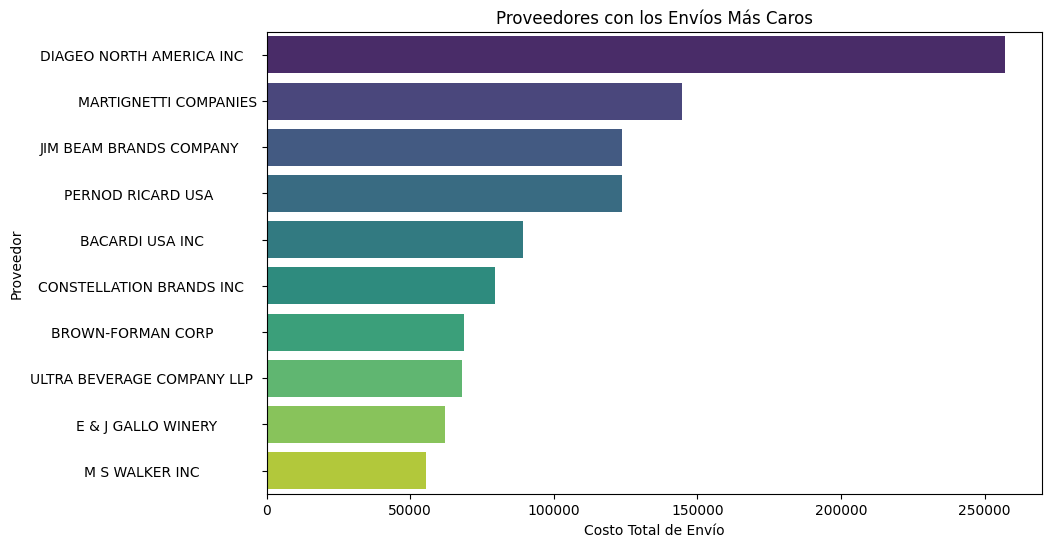

In [23]:
# Gráfico: Proveedores con los Envíos Más Caros
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_envios.values, y=top_10_envios.index, palette='viridis')
plt.title('Proveedores con los Envíos Más Caros')
plt.xlabel('Costo Total de Envío')
plt.ylabel('Proveedor')
plt.show()

C:\Users\danip\AppData\Local\Temp\ipykernel_18340\2293968462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette= 'viridis')


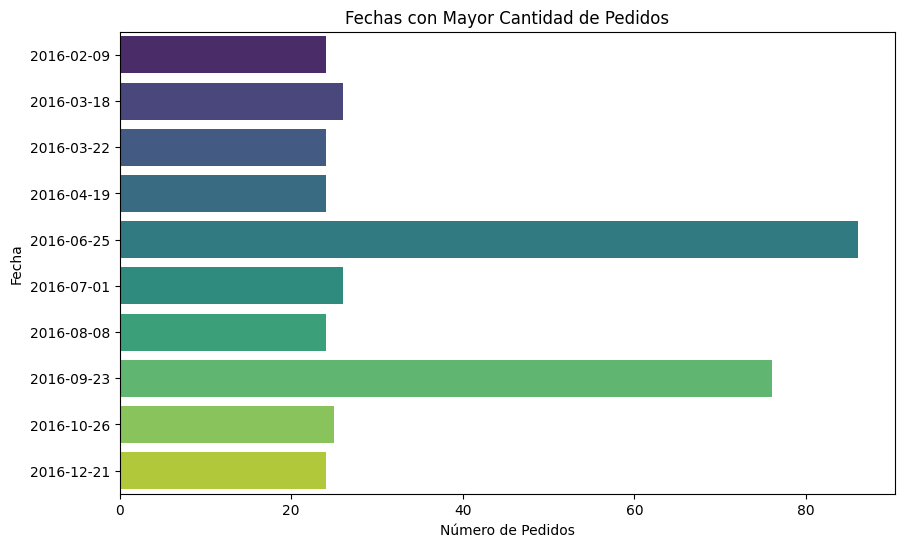

In [24]:
# Gráfico: Fechas con Mayor Cantidad de Pedidos
top_10_fechas_sorted = top_10_fechas.sort_index()  # Ordenar por fecha
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette= 'viridis')
plt.title('Fechas con Mayor Cantidad de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Fecha')
plt.show()

In [25]:
#Cambio de nombres y traducción de las Columnas 

# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Proveedor',
    'InvoiceDate': 'Fecha_facturacion',
    'PONumber': 'CompraID',
    'PODate': 'Fecha_compra',
    'PayDate': 'Fecha_pago',
    'Quantity': 'Cantidad',
    'Dollars': 'Precio_total',
    'Freight': 'Costo_envio',
    'Approval': 'Aprobacion'
}

# Renombrar las columnas
df_InvoicePurchase.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_InvoicePurchase.head())

   ProveedorID                    Proveedor Fecha_facturacion  CompraID  \
0          105  ALTAMAR BRANDS LLC                 2016-01-04      8124   
1         4466  AMERICAN VINTAGE BEVERAGE          2016-01-07      8137   
2          388  ATLANTIC IMPORTING COMPANY         2016-01-09      8169   
3          480  BACARDI USA INC                    2016-01-12      8106   
4          516  BANFI PRODUCTS CORP                2016-01-07      8170   

  Fecha_compra  Fecha_pago  Cantidad  Precio_total  Costo_envio Aprobacion  
0   2015-12-21  2016-02-16         6        214.26         3.47  No Aplica  
1   2015-12-22  2016-02-21        15        140.55         8.57  No Aplica  
2   2015-12-24  2016-02-16         5        106.60         4.61  No Aplica  
3   2015-12-20  2016-02-05     10100     137483.78      2935.20  No Aplica  
4   2015-12-24  2016-02-12      1935      15527.25       429.20  No Aplica  


In [26]:
# Seleccionar las columnas de interes para crear el archivo final
df_InvoicePurchase_Final = df_InvoicePurchase[['CompraID', 'ProveedorID', 'Fecha_compra', 'Fecha_facturacion', 'Fecha_pago', 'Precio_total', 'Costo_envio', 'Aprobacion']]

In [29]:
# Guardar el nuevo dataframe en un archivo CSV

df_InvoicePurchase_Final.to_csv('C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/ORDENES_COMPRA.csv', index=False)

In [28]:
df_InvoicePurchase_Final.head()

,CompraID,ProveedorID,Fecha_compra,Fecha_facturacion,Fecha_pago,Precio_total,Costo_envio,Aprobacion
0,8124,105,2015-12-21,2016-01-04,2016-02-16,214.26,3.47,No Aplica
1,8137,4466,2015-12-22,2016-01-07,2016-02-21,140.55,8.57,No Aplica
2,8169,388,2015-12-24,2016-01-09,2016-02-16,106.60,4.61,No Aplica
3,8106,480,2015-12-20,2016-01-12,2016-02-05,137483.78,2935.20,No Aplica
4,8170,516,2015-12-24,2016-01-07,2016-02-12,15527.25,429.20,No Aplica
